# Homework 3
DASC 512  
Richy Peterson

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set_style('whitegrid')

## Problem 1


In [19]:
# (a)

er_visits = [10, 8, 14, 7, 21, 44, 60]

mu = np.mean(er_visits)
print(f'mean number of visits: {mu}')
print(f'median number of visits: {np.median(er_visits)}')


mean number of visits: 23.428571428571427
median number of visits: 14.0


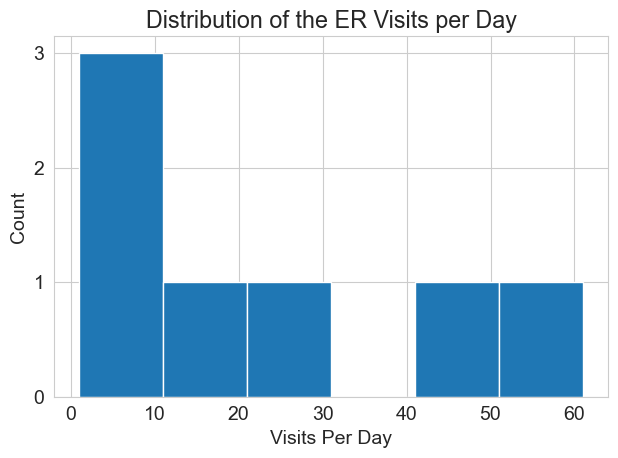

In [17]:


fig, ax = plt.subplots()
ax.hist(x=er_visits,bins=list(range(1,70,10)))
ax.set_title('Distribution of the ER Visits per Day')
ax.set_xlabel('Visits Per Day')
ax.set_ylabel('Count')
ax.set_yticks([0,1,2,3])
fig.tight_layout()
fig.savefig('3_1_hist_er_vists.png')

In [14]:
dist = stats.poisson(mu=mu)

In [15]:
pmf_x = list(range(1,max(er_visits)+5))
pmf = [dist.pmf(xx) for xx in pmf_x]

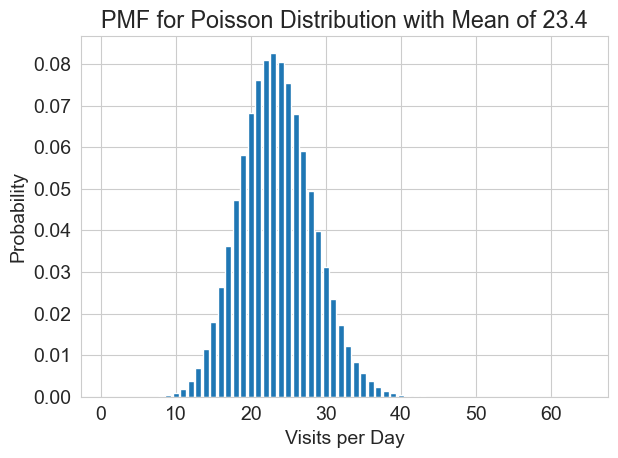

In [18]:
fig, ax = plt.subplots()
ax.bar(x=pmf_x,height=pmf)
ax.set_title(f'PMF for Poisson Distribution with Mean of {mu:.3}')
ax.set_xlabel('Visits per Day')
ax.set_ylabel('Probability')
fig.tight_layout()
fig.savefig('3_1_pmf_poisson.png')

In [10]:
dist.sf(40)

0.0006325008284980833

The pribability of having over 40 in a day is very low, but in the week there were two days

In [20]:
dist.cdf(15)

0.0436741417646791

---

## Problem 2

In [43]:
mu_a = 500
mu_b = 450
sigma = 100
dist_a = stats.norm(loc=mu_a, scale=sigma)
dist_b = stats.norm(loc=mu_b, scale=sigma)
p_a = 0.5
p_b = 0.5

In [45]:
# (a)
p_d_b = dist_b.cdf(600) - dist_b.cdf(400)
p_d_b

0.624655260005155

In [40]:
p_d_a = dist_a.cdf(600) - dist_a.cdf(400)
p_d_a

0.6826894921370859

In [44]:
p_b_d = p_b * p_d_b / ((p_b * p_d_b) + (p_a * p_d_a))
p_b_d

0.47780454159591995

In [46]:
# (b)

def calculate_p_b_d(dist_b, dist_a, high_cutoff, low_cutoff=400, p_b=0.5):
    '''
    Caluculates the probability of being from group B given the student decided to attend.
    '''
    p_d_b = dist_b.cdf(high_cutoff) - dist_b.cdf(low_cutoff)
    p_d_a = dist_a.cdf(high_cutoff) - dist_a.cdf(low_cutoff)
    p_a = 1 - p_b
    p_b_d = p_b * p_d_b / ((p_b * p_d_b) + (p_a * p_d_a))
    return p_b_d


In [47]:
cutoff_scores = list(range(410,800,10))
prob_b_given_score = [calculate_p_b_d(dist_b=dist_b, dist_a=dist_a, high_cutoff=score) for score in cutoff_scores]


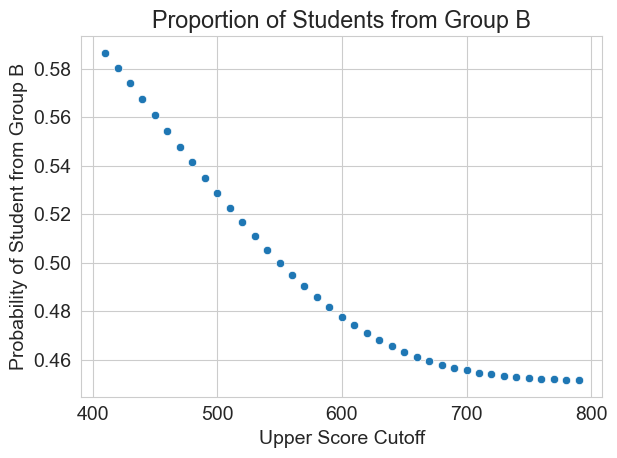

In [54]:
fig, ax = plt.subplots()
sns.scatterplot(x=cutoff_scores, y=prob_b_given_score, ax=ax)
ax.set_title('Proportion of Students from Group B')
ax.set_xlabel('Upper Score Cutoff')
ax.set_ylabel('Probability of Student from Group B')
fig.tight_layout()
fig.savefig('3_2_b_prob_B_upper_cutoff.png')

---
## Problem 3

In [39]:
lamb = 2
dist = stats.poisson(mu=lamb)

In [75]:
# (a)
n = 2
bigN = 1000
means = [np.mean(dist.rvs(size=n)) for _ in range(bigN)]

# normal distribution
mean_means = np.mean(means)
stddev_means = np.std(means)
normdist = stats.norm(loc=mean_means,scale=stddev_means)
pdf_x = np.linspace(0,np.max(means)+.1,1000)
pdf = [normdist.pdf(xx) for xx in pdf_x]

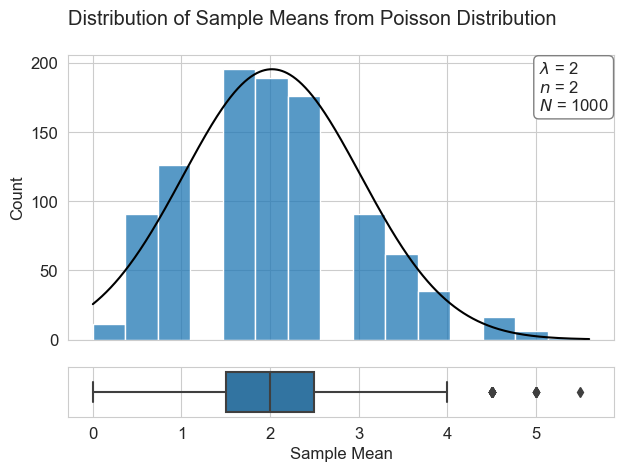

In [76]:
plt.rc('font',size=12)
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios':(.85,.15)})
sns.boxplot(x=means, ax=ax2)
sns.histplot(x=means, ax=ax1, bins=15)
fig.suptitle(f'Distribution of Sample Means from Poisson Distribution')
ax2.set_xlabel('Sample Mean')
ax1.text(x=0.99,y=.98, s=f'$\lambda$ = {lamb}\n$n$ = {n}\n$N$ = {bigN}', transform=ax1.transAxes, va='top', ha='right', ma='left', 
         bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round'))

sns.lineplot(x=pdf_x,y=np.multiply(pdf, ax1.get_ylim()[1]*.95 / (np.max(pdf))),ax=ax1,color='black')


fig.tight_layout()
fig.savefig('3_3a_dist_means_hist_box_n2.png')

In [62]:
# (b)

n = 10
means = [np.mean(dist.rvs(size=n)) for _ in range(bigN)]

# normal distribution
mean_means = np.mean(means)
stddev_means = np.std(means)
normdist = stats.norm(loc=mean_means,scale=stddev_means)
pdf_x = np.linspace(0,np.max(means)+.1,1000)
pdf = [normdist.pdf(xx) for xx in pdf_x]


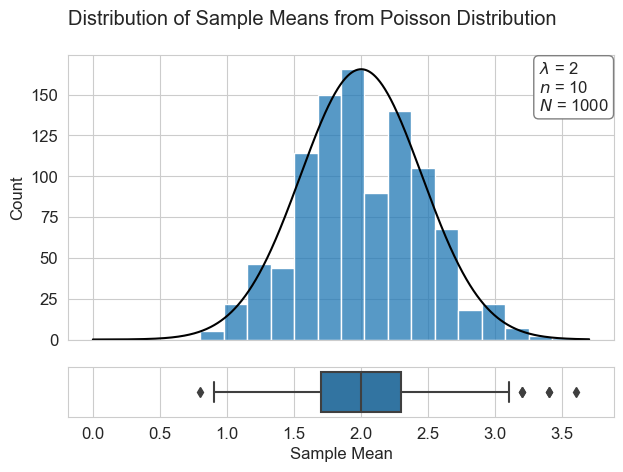

In [70]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios':(.85,.15)})
sns.boxplot(x=means, ax=ax2)
sns.histplot(x=means, ax=ax1, bins=16)
fig.suptitle(f'Distribution of Sample Means from Poisson Distribution')
ax2.set_xlabel('Sample Mean')
ax1.text(x=0.99,y=.98, s=f'$\lambda$ = {lamb}\n$n$ = {n}\n$N$ = {bigN}', transform=ax1.transAxes, va='top', ha='right', ma='left',
         bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round'))

sns.lineplot(x=pdf_x,y=np.multiply(pdf, ax1.get_ylim()[1]*.95 / (np.max(pdf))),ax=ax1,color='black')


fig.tight_layout()
fig.savefig('3_3b_dist_means_hist_box_n10.png')

In [82]:
def plot_hist_box(x):
    fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios':(.85,.15)})
    sns.boxplot(x=x, ax=ax2)
    sns.histplot(x=x, ax=ax1)
    fig.suptitle('')
    # normal distribution
    mean_means = np.mean(x)
    stddev_means = np.std(x)
    normdist = stats.norm(loc=mean_means,scale=stddev_means)
    pdf_x = np.linspace(np.min(means)-.1,np.max(means)+.1,1000)
    pdf = [normdist.pdf(xx) for xx in pdf_x]
    sns.lineplot(x=pdf_x,y=np.multiply(pdf, ax1.get_ylim()[1]*.95 / (np.max(pdf))),ax=ax1,color='black')
    fig.tight_layout()
    fig.savefig(f'3_3c_hist_box_n_{n}.png')
    return fig

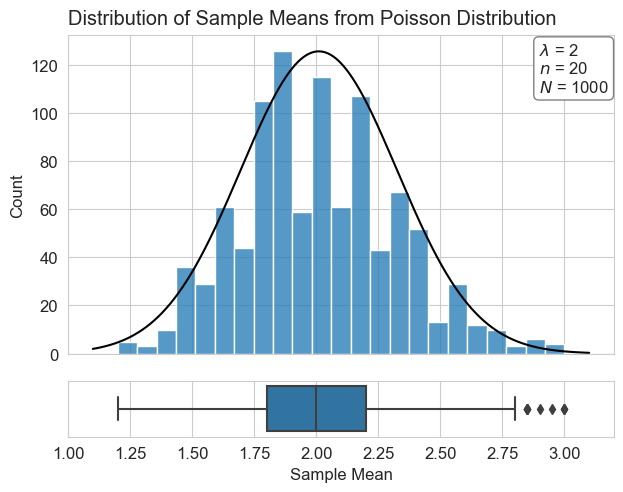

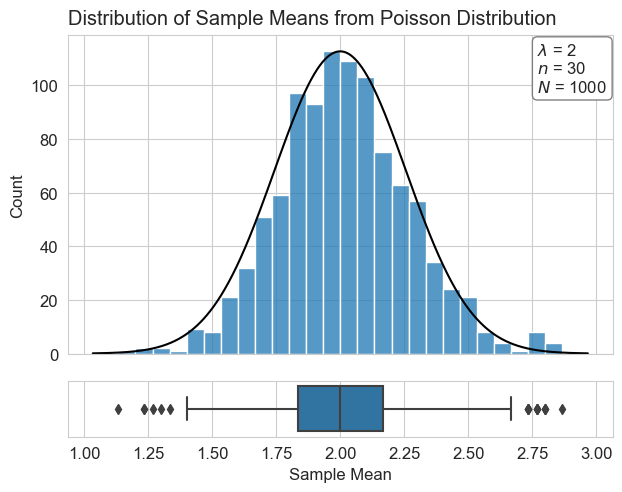

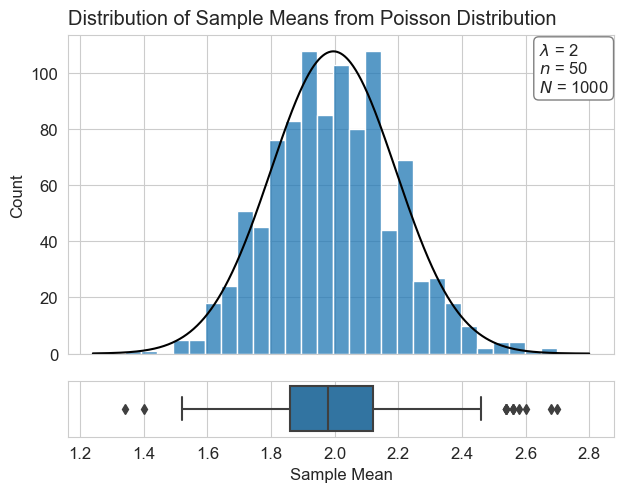

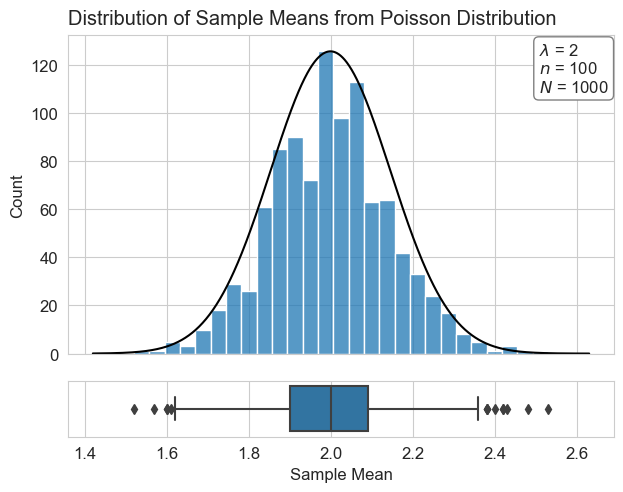

In [85]:
for n in [20,30,50,100]:
    means = [np.mean(dist.rvs(size=n)) for _ in range(bigN)]
    fig = plot_hist_box(means)
    fig.suptitle(f'Distribution of Sample Means from Poisson Distribution')
    (ax1,ax2) = fig.axes
    ax2.set_xlabel('Sample Mean')
    ax1.text(x=0.99,y=.98, s=f'$\lambda$ = {lamb}\n$n$ = {n}\n$N$ = {bigN}', transform=ax1.transAxes, va='top', ha='right', ma='left', 
                bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round'))
    plt.show()